In [1]:
#Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

C:\Users\sampa\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Set the display option to show all columns when printing DataFrames
pd.set_option("display.max_columns",None)

In [5]:
# Read a CSV file located at the specified path and load it into a DataFrame 'df'
df = pd.read_csv("C:/Users/sampa/OneDrive/Desktop/sannidhi/Masai/Projects/Practo/data/model_df.csv")

In [6]:
df.head()

,Year_of_experience,dp_score,npv,consultation_fee,MSc,PGD,MS,FDSRCS,BDS,DDVL,BAMS,MNAMS,PGDCC,DFFP,BNYS,DDPHN,DPMDB,MFGDP,FCPS,DNHE,PGDE,FFDRCSI,DNB,DHMS,FRANZCP,MRCP,DDV,DDHN,DTCD,FNB,DMD,Diplomate,DICOI,OBG,BSc,FRACP,FAM,FAICO,DCH,FCCM,MBBS,MRCOGUK,FICOI,MDS,DM,DVD,FICOG,MRCS,MScBSc,FMC,FICS,FRCPCH,FRCP,MD,MRCPCH,DOMS,MPH,FRCS,DPM,Diploma,DMDB,FACC,NDDY,DO,MCh,DGO,BHMS,FRCOG,FCCP,PhD,Speciality_Bariatric,Speciality_Cardiologist,Speciality_Dentist,Speciality_Dermatologist,Speciality_Dietitian,Speciality_Gastroenterologist,Speciality_Gynecologist,Speciality_Infertility Specialist,Speciality_Neurologist,Speciality_Neurosurgeon,Speciality_Ophthalmologist,Speciality_Orthopedist,Speciality_Pediatrician,Speciality_Physiotherapist,Speciality_Psychiatrist,Speciality_Pulmonologist,Speciality_Rheumatologists,Speciality_Urologist,Location_AECS Layout,Location_Akshaya nagar,Location_Alaknanda,Location_Anand Niketan,Location_Anand Vihar,Location_Andheri,Location_Andheri East,Location_Andheri West,Location_Ansari Nagar,Location_Arekere,Location_Ashok Vihar,Location_Ashok Vihar Phase 1,Location_Ashoknagar,Location_Avalahalli,Location_Azadpur,Location_BEL Layout,Location_BTM Layout,Location_BTM Layout 1st Stage,Location_BTM Layout 2nd Stage,Location_Bagalur,Location_Bali Nagar,Location_Banashankari,Location_Banashankari 1st Stage,Location_Banashankari 2nd Stage,Location_Banashankari 3rd Stage,Location_Banaswadi,Location_Bandra,Location_Bandra East,Location_Bandra West,Location_Bannerghatta Road,Location_Basavanagudi,Location_Basaveshwaranagar,Location_Begur,Location_Belathur,Location_Bellandur,Location_Bhandup,Location_Bhandup West,Location_Bhattarahalli,Location_Bhogal,Location_Bilekahalli,Location_Bommanahalli,Location_Bommasandra,Location_Borivali,Location_Borivali East,Location_Borivali West,Location_Brigade Road,Location_Burari,Location_CR Park,Location_CV Raman Nagar,Location_Chamarajpet,Location_Chanakyapuri,Location_Chandivali,Location_Chandra Layout,Location_Charni Road,Location_Chattarpur,Location_Chembur,Location_Chembur East,Location_Chembur West,Location_Chinchpokli,Location_Chira Bazaar,Location_Chirag Delhi,Location_Chitra Vihar,Location_Churchgate,Location_Colaba,Location_Connaught Place,Location_Cuffe Parade,Location_Cumballa Hill,Location_DLF Newtown,Location_DN Nagar,Location_Dadar,Location_Dadar East,Location_Dadar West,Location_Dahisar,Location_Dahisar East,Location_Dahisar West,Location_Dasarahalli,Location_Dashrath Puri,Location_Defence Colony,Location_Delhi,Location_Dilshad Garden,Location_Doddakammanahalli,Location_Domlur,Location_Dongri,Location_Durga Puri,Location_Dwarka,Location_Dwarka Sector 11,Location_Dwarka Sector 12,Location_Dwarka Sector 13,Location_Dwarka Sector 17,Location_Dwarka Sector 19,Location_Dwarka Sector 22,Location_Dwarka Sector 23,Location_Dwarka Sector 3,Location_Dwarka Sector 6,Location_Dwarka Sector 7,Location_Dwarka Sector 8,Location_Dwarka Sector 9,Location_East Of Kailash,Location_Electronics City,Location_Elphinstone Road,Location_Fort,Location_Frazer Town,Location_Ghatkopar,Location_Ghatkopar East,Location_Ghatkopar West,Location_Ghitorni,Location_Girgaon,Location_Goregaon,Location_Goregaon East,Location_Goregaon West,Location_Govandi,Location_Grant Road,Location_Greater Kailash,Location_Greater Kailash Part 1,Location_Greater Kailash Part 2,Location_Green Park,Location_Gubbalala,Location_Gujranwala Town,Location_Gulabi Bagh,Location_Gunjur,Location_HAL 2nd Stage,Location_HAL 3rd Stage,Location_HBR Layout,Location_HRBR Layout,Location_HSR Layout,Location_Hanumanthnagar,Location_Hari Nagar,Location_Harlur,Location_Harsh Vihar,Location_Hauz Khas,Location_Hebbal,Location_Hebbal Kempapura,Location_Hegde Nagar,Location_Hennur,Location_Hongasandra,Location_Hoodi,Location_Horamavu,Location_Hosur Road,Location_Hulimavu,Location_IP Extension,Location_Indiranagar,Location_JB Nagar,Location_JP Nagar,Location_JP Nagar 1 Phase,Location_JP Nagar 2 Phase,Location_JP Nagar 3 Phase,Location_JP Nagar 4 Pha

In [7]:
df.shape

(4666, 514)

In [94]:
df.columns

Index(['Year_of_experience', 'dp_score', 'npv', 'consultation_fee', 'MSc',
       'PGD', 'MS', 'FDSRCS', 'BDS', 'DDVL',
       ...
       'Location_Yelachenahalli', 'Location_Yelahanka',
       'Location_Yelahanka New Town', 'Location_Yelenahalli',
       'Location_Yeshwanthpur', 'Location_Yojana Vihar',
       'Location_Zakir Nagar', 'City_Bangalore', 'City_Delhi', 'City_Mumbai'],
      dtype='object', length=514)

In [95]:
new_column_names = {
    'City_Bangalore': 'Bangalore',
    'City_Delhi': 'Delhi',
    'City_Mumbai': 'Mumbai'
}

In [ ]:
df.rename(columns=new_column_names, inplace=True)

In [8]:
df.isnull().sum()

Year_of_experience       0
dp_score                 0
npv                      0
consultation_fee         0
MSc                      0
                        ..
Location_Yojana Vihar    0
Location_Zakir Nagar     0
City_Bangalore           0
City_Delhi               0
City_Mumbai              0
Length: 514, dtype: int64

In [12]:
num = ['Year_of_experience', 'dp_score', 'npv']

In [13]:
sc = StandardScaler()

In [14]:
df[num] = sc.fit_transform(df[num])

In [15]:
df[num]

,Year_of_experience,dp_score,npv
0,0.086762,-1.532494,-0.441865
1,0.322130,0.623673,0.049540
2,0.204446,0.048695,-0.830418
3,1.969703,0.623673,-0.704710
4,-1.325444,0.623673,-0.704710
...,...,...,...
4661,1.498968,0.719503,0.300957
4662,-0.148605,0.695546,0.243817
4663,2.205071,0.743460,-0.670426
4664,1.028233,0.575759,-0.761850


In [16]:
df.shape

(4666, 514)

In [17]:
X = df.drop("consultation_fee",axis =1)
y = df['consultation_fee']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model, metrics
from xgboost import XGBRFRegressor
from sklearn.metrics import accuracy_score
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import AdaBoostRegressor

In [24]:
# Create a dictionary 'mod' containing different regression models as values
mod = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'Support Vector Regression' : SVR(),
    'Ridge Regression' : Ridge(alpha=0.5),
    'Lasso Regression' : Lasso(alpha=0.1),
    'XGBoost model' : XGBRFRegressor(n_estimators=100, random_state=42),
    'AdaBoost Regressor' : AdaBoostRegressor(n_estimators=100, random_state=42)
}

In [25]:
# Iterate through each regression model and evaluate its performance
for name, model in mod.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(f'mse: {mean_squared_error(y_test, y_pred)} rmse: {mean_squared_error(y_test, y_pred)**0.5}: r2_score: {r2_score(y_test, y_pred)}')
    print('***************************************')

Linear Regression
mse: 5.297311361476968e+26 rmse: 23015888775967.285: r2_score: -4.7066681244461564e+21
***************************************
Decision Tree Regressor
mse: 72230.59357142857 rmse: 268.7574995631351: r2_score: 0.3582302244025901
***************************************
Random Forest Regressor
mse: 39502.89818607143 rmse: 198.7533601881272: r2_score: 0.6490162291238528
***************************************
GradientBoostingRegressor
mse: 45840.801259665364 rmse: 214.1046502523132: r2_score: 0.5927038768063242
***************************************
Support Vector Regression
mse: 89208.3516854316 rmse: 298.677671889667: r2_score: 0.20738261985956508
***************************************
Ridge Regression
mse: 43908.5688273707 rmse: 209.54371579069294: r2_score: 0.6098717874264896
***************************************
Lasso Regression
mse: 42620.89355489138 rmse: 206.44828300301114: r2_score: 0.6213127991889662
***************************************
XGBoost model
mse:

## CV on AdaBoost 

In [ ]:
param_grid = {
    'n_estimators': [200,300,400,500],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square', 'exponential']
}
base_estimator = DecisionTreeRegressor()

# Create the AdaBoost regressor
adaboost = AdaBoostRegressor(base_estimator=base_estimator)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, error_score='raise')
grid_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

GridSearchCV(cv=5, error_score='raise',
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor()),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2S=r2_score(y_test,y_pred)
print("Best parameters:", best_params)
print("Best MSE:", mse)
print("R2 Score",r2S)

Best parameters: {'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 100}
Best MSE: 108941.7655382407
R2 Score 0.43586927637780226


In [ ]:
# Base models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor()
gradient_Boosting_model = GradientBoostingRegressor()
svr_model = SVR()
ridge_model = Ridge(alpha=0.5)
lasso_model = Lasso(alpha=0.1)
xgboost_model = XGBRFRegressor(n_estimators=100, random_state=42)
adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=42)

## Ensebmle techniques before hyperparameter tunning

In [ ]:
# Model Averaging
models = [linear_model, tree_model, forest_model,gradient_Boosting_model, svr_model, ridge_model, lasso_model, xgboost_model, adaboost_model ]
averaged_predictions = np.zeros_like(y_test)

for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    averaged_predictions = averaged_predictions.astype('float64')
    averaged_predictions += predictions

averaged_predictions /= len(models)
averaged_mse = mean_squared_error(y_test, averaged_predictions)
averaged_r2 = r2_score(y_test, averaged_predictions)

print("Model Averaging MSE:", averaged_mse)
print("Model Averaging RMSE:", averaged_mse**0.5)
print("r2_score of Model Averaging", averaged_r2)

Model Averaging MSE: 100791.79255002744
Model Averaging RMSE: 317.47723154586606
r2_score of Model Averaging 0.47807210039691783


In [ ]:
# Stacking
meta_model = LinearRegression()
stacked_predictions = np.zeros_like(y_test)

for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    stacked_predictions = np.column_stack((stacked_predictions, predictions))

stacked_predictions = stacked_predictions[:, 1:]  # Remove the initial zeros column
meta_model.fit(stacked_predictions, y_test)
stacked_predictions = stacked_predictions.mean(axis=1)
stacked_mse = mean_squared_error(y_test, stacked_predictions)
stacked_r2 = r2_score(y_test, stacked_predictions)

print("Stacking MSE:", stacked_mse)
print("Sqrt of Stacking RMSE:", stacked_mse**0.5)
print("r2_score of Stacking:", stacked_r2)

Stacking MSE: 101155.8512764699
Sqrt of Stacking RMSE: 318.05007668049683
r2_score of Stacking: 0.476186903183762


In [ ]:
# Weighted Voting
weights = [0.2, 0.35, 0.45]  # Adjust the weights as desired
weighted_predictions = np.zeros_like(y_test)
model1 = [linear_model,gradient_Boosting_model, xgboost_model]
for model, weight in zip(model1, weights):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    weighted_predictions = weighted_predictions.astype('float64')
    weighted_predictions += weight * predictions

weighted_mse = mean_squared_error(y_test, weighted_predictions)
weighted_r2 = r2_score(y_test, weighted_predictions)

print("Weighted Voting MSE:", weighted_mse)
print("Weighted Voting RMSE:", weighted_mse**0.5)
print("r2_score of Weighted Voting:", weighted_r2)

Weighted Voting MSE: 99060.1817283918
Weighted Voting RMSE: 314.73827496571147
r2_score of Weighted Voting: 0.48703886223536474


In [ ]:
# Model Averaging only 3
models = [linear_model, tree_model, forest_model,gradient_Boosting_model, svr_model, ridge_model, lasso_model, xgboost_model]
averaged_predictions = np.zeros_like(y_test)

for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    averaged_predictions = averaged_predictions.astype('float64')
    averaged_predictions += predictions

averaged_predictions /= len(models)
averaged_mse = mean_squared_error(y_test, averaged_predictions)
averaged_r2 = r2_score(y_test, averaged_predictions)

print("Model Averaging MSE:", averaged_mse)
print("Model Averaging RMSE:", averaged_mse**0.5)
print("r2_score of Model Averaging", averaged_r2)

Model Averaging MSE: 100178.5415775878
Model Averaging RMSE: 316.5099391450256
r2_score of Model Averaging 0.4812476842800608


## GridSearchCV

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tunning for each Models

## Lasso Model

In [27]:
lasso =Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,0,1,5,10,20,30,35,40,45,50,54,55,56,57,58,59,60,70,75,77,80,90,95,100]}
lasso_regression=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=10)

In [28]:
lasso_regression.fit(X_train,y_train)

C:\Users\sampa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.304e+07, tolerance: 3.478e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\sampa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.187e+07, tolerance: 3.411e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\sampa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.201e+07, toleranc

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0, 1, 5,
                                   10, 20, 30, 35, 40, 45, 50, 54, 55, 56, 57,
                                   58, 59, 60, 70, 75, 77, 80, 90, 95, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)
print(lasso_regression.best_estimator_)

{'alpha': 1e-15}
-107883.9688404892
Lasso(alpha=1e-15)


In [ ]:
lasso =Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,0,1,5,10,20,30,35,40,45,50,54,55,56,57,58,59,60,70,75,77,80,90,95,100]}
lasso_regression=GridSearchCV(lasso,parameters,scoring='r2',cv=10)

In [ ]:
lasso_regression.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.463e+07, tolerance: 4.727e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e+08, tolerance: 4.794e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.800e+07, tolerance: 4.773e

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0, 1, 5,
                                   10, 20, 30, 35, 40, 45, 50, 54, 55, 56, 57,
                                   58, 59, 60, 70, 75, 77, 80, 90, 95, 100]},
             scoring='r2')

In [ ]:
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)
print(lasso_regression.best_estimator_)

{'alpha': 0}
0.47028641170717
Lasso(alpha=0)


In [ ]:
lasso_model = Lasso(alpha=0.1)

In [ ]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred_l = lasso_model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred_l )

105593.58250019567

In [ ]:
r2_score(y_test,y_pred_l)

0.45320709820159955

In [ ]:
lasso =Lasso()
parameters={'alpha':np.linspace(-3,3,20)}
lasso_regression=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=10)

In [ ]:
lasso_regression.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 892, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-pack

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([-3.        , -2.68421053, -2.36842105, -2.05263158, -1.73684211,
       -1.42105263, -1.10526316, -0.78947368, -0.47368421, -0.15789474,
        0.15789474,  0.47368421,  0.78947368,  1.10526316,  1.42105263,
        1.73684211,  2.05263158,  2.36842105,  2.68421053,  3.        ])},
             scoring='neg_mean_squared_error')

In [29]:
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)
print(lasso_regression.best_estimator_)

{'alpha': 0.01}
-50191.15563991812
Lasso(alpha=0.01)


In [31]:
lasso_model = Lasso(alpha=0.1)

In [32]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [33]:
y_pred_LaT = lasso_model.predict(X_test)

In [34]:
mean_squared_error(y_test,y_pred_LaT )

42620.89355489138

In [35]:
r2_score(y_test,y_pred_LaT)

0.6213127991889662

In [37]:
train_scores = []
test_scores = []

In [38]:
alphas = np.linspace(-3,3,20)
alphas

array([-3.        , -2.68421053, -2.36842105, -2.05263158, -1.73684211,
       -1.42105263, -1.10526316, -0.78947368, -0.47368421, -0.15789474,
        0.15789474,  0.47368421,  0.78947368,  1.10526316,  1.42105263,
        1.73684211,  2.05263158,  2.36842105,  2.68421053,  3.        ])

C:\Users\sampa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.389e+07, tolerance: 3.820e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\sampa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.482e+05, tolerance: 3.820e+04
  model = cd_fast.enet_coordinate_descent(


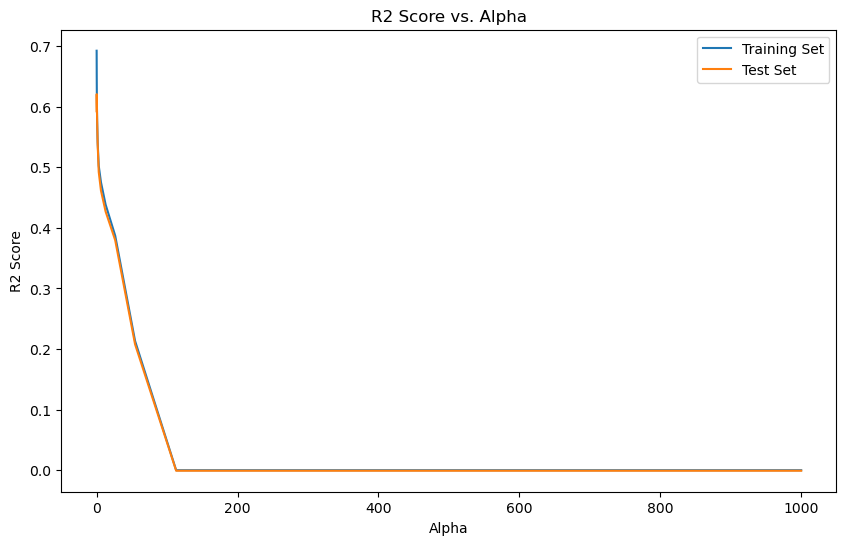

In [39]:

# Define a range of alpha values to explore
alphas = np.logspace(-3, 3, num=20)

# Create empty lists to store the R2 scores for training and test sets
train_scores = []
test_scores = []

# Iterate over the alpha values, fit the model, and calculate the R2 scores
for alpha in alphas:
    model = Lasso(alpha = alpha)  # Use your desired model
    model.fit(X_train, y_train)

    # Calculate R2 scores for training and test sets
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_score = r2_score(y_train, train_pred)
    test_score = r2_score(y_test, test_pred)

    # Append scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the R2 scores versus alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_scores, label='Training Set')
plt.plot(alphas, test_scores, label='Test Set')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
#plt.xscale('log')
plt.legend()
plt.title('R2 Score vs. Alpha')
plt.show()


## CV on Random Forest Model

In [43]:
random_forest =RandomForestRegressor()
# parameters={'n_estimators':[100, 200 , 300], 'max_depth' : [3,5,7], 'criterion' : ['mse', 'mae']}
parameters={'n_estimators':[100, 200 , 300], 'max_depth' : [3,5,7]}
random_forest_regression=GridSearchCV(random_forest,parameters,scoring='r2',cv=5)

In [44]:
random_forest_regression.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [45]:
print(random_forest_regression.best_params_)
print(random_forest_regression.best_score_)
print(random_forest_regression.best_estimator_)

{'max_depth': 7, 'n_estimators': 200}
0.5315216895672146
RandomForestRegressor(max_depth=7, n_estimators=200)


In [46]:
random_forest_model = RandomForestRegressor(n_estimators=200, max_depth=7)

In [48]:
random_forest_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=200)

In [49]:
y_pred_r = random_forest_model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred_r )

102839.0293448337

In [50]:
r2_score(y_test,y_pred_r)

0.5495070004035163

In [51]:
#without passing any parameters

In [75]:
random_forest_model2 = RandomForestRegressor()

In [76]:
random_forest_model2.fit(X_train,y_train)

RandomForestRegressor()

In [78]:
y_pred_r2 = random_forest_model2.predict(X_test)

In [79]:
mean_squared_error(y_test,y_pred_r2)

39736.805275785715

In [80]:
r2_score(y_test,y_pred_r2)

0.6469379615497656

In [ ]:
# Define the hyperparameters to tune and their ranges
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [ 5, 10],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
train_scores = []
test_scores = []


In [ ]:
# Iterate over the hyperparameter combinations, fit the Random Forest Regressor, and calculate the R2 scores
for params in param_grid.values():
    for param_value in params:
        # Create a dictionary with the current hyperparameter value
        param_dict = {list(param_grid.keys())[0]: param_value}

        # Create the Random Forest Regressor with the specified hyperparameters
        model = RandomForestRegressor(**param_dict)
        model.fit(X_train, y_train)

        # Predict on the training and test sets
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        # Calculate the R2 scores for training and test sets
        train_score = r2_score(y_train, train_pred)
        test_score = r2_score(y_test, test_pred)

        # Append the scores to the respective lists
        train_scores.append(train_score)
        test_scores.append(test_score)


In [ ]:

# Plot the R2 scores versus the corresponding hyperparameter values
param_values = range(len(train_scores))

plt.figure(figsize=(10, 6))
plt.plot(param_values, train_scores, label='Training Set')
plt.plot(param_values, test_scores, label='Test Set')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('R2 Score')
plt.legend()
plt.title('R2 Score vs. Hyperparameter Combination')
plt.xticks(param_values, rotation='vertical')
plt.show()

## CV on Ridge

In [57]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,0,1,5,10,20,30,35,40,45,50,54,55,56,57,58,59,60,70,75,77,80,90,95,100]}
ridge_regression=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)

In [58]:
ridge_regression.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0, 1, 5,
                                   10, 20, 30, 35, 40, 45, 50, 54, 55, 56, 57,
                                   58, 59, 60, 70, 75, 77, 80, 90, 95, 100]},
             scoring='neg_mean_squared_error')

In [59]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)
print(ridge_regression.best_estimator_)

{'alpha': 5}
-47656.5432916772
Ridge(alpha=5)


In [60]:
ridge_model =Ridge(alpha = 5)

In [61]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=5)

In [62]:
y_pred_ri = ridge_model.predict(X_test)

In [63]:
mean_squared_error(y_test, y_pred_ri)

42798.66880469509

In [64]:
r2_score(y_test, y_pred_ri)

0.6197332637520814

In [81]:
# Base models
forest_model = RandomForestRegressor()
ridge_model = Ridge(alpha=5)
lasso_model = Lasso(alpha=0.1)

In [82]:
# Model Averaging
models = [forest_model, ridge_model, lasso_model]
averaged_predictions = np.zeros_like(y_test)

for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    averaged_predictions = averaged_predictions.astype('float64')
    averaged_predictions += predictions

averaged_predictions /= len(models)
averaged_mse = mean_squared_error(y_test, averaged_predictions)
averaged_r2 = r2_score(y_test, averaged_predictions)

print("Model Averaging MSE:", averaged_mse)
print("Model Averaging RMSE:", averaged_mse**0.5)
print("r2_score of Model Averaging", averaged_r2)

Model Averaging MSE: 39216.45395317304
Model Averaging RMSE: 198.03144687946164
r2_score of Model Averaging 0.651561289907364


In [83]:
# Stacking
meta_model = LinearRegression()
stacked_predictions = np.zeros_like(y_test)
models = [forest_model, ridge_model, lasso_model]

for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    stacked_predictions = np.column_stack((stacked_predictions, predictions))

stacked_predictions = stacked_predictions[:, 1:]  # Remove the initial zeros column
meta_model.fit(stacked_predictions, y_test)
stacked_predictions = stacked_predictions.mean(axis=1)
stacked_mse = mean_squared_error(y_test, stacked_predictions)
stacked_r2 = r2_score(y_test, stacked_predictions)

print("Stacking MSE:", stacked_mse)
print("Sqrt of Stacking RMSE:", stacked_mse**0.5)
print("r2_score of Stacking:", stacked_r2)

Stacking MSE: 39305.375315977624
Sqrt of Stacking RMSE: 198.25583299357834
r2_score of Stacking: 0.6507712224272113


In [86]:
# Weighted Voting
weights = [0.7, 0.2, 0.1]  # Adjust the weights as desired
weighted_predictions = np.zeros_like(y_test)
models = [forest_model, lasso_model, ridge_model ]
for model, weight in zip(models, weights):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    weighted_predictions = weighted_predictions.astype('float64')
    weighted_predictions += weight * predictions

weighted_mse = mean_squared_error(y_test, weighted_predictions)
weighted_r2 = r2_score(y_test, weighted_predictions)

print("Weighted Voting MSE:", weighted_mse)
print("Weighted Voting RMSE:", weighted_mse**0.5)
print("r2_score of Weighted Voting:", weighted_r2)

Weighted Voting MSE: 38581.10868357409
Weighted Voting RMSE: 196.4207440256097
r2_score of Weighted Voting: 0.6572063409991036


In [87]:
forest_model = RandomForestRegressor()
ridge_model = Ridge(alpha=5)
lasso_model = Lasso(alpha=0.1)

In [88]:
import pickle
from sklearn.linear_model import LogisticRegression

In [89]:
# Save the trained model using Pickle
with open('trained_RandomForest.pickle', 'wb') as file:
    pickle.dump(forest_model, file)

In [90]:
# Save the trained model using Pickle
with open('trained_Ridge_model.pickle', 'wb') as file:
    pickle.dump(ridge_model, file)

In [91]:
# Save the trained model using Pickle
with open('trained_Lasso_model.pickle', 'wb') as file:
    pickle.dump(lasso_model, file)

In [93]:
# Save the trained model using Pickle
with open('trained_Sc.pickle', 'wb') as file:
    pickle.dump(sc, file)